In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/threads-an-instagram-app-reviews/threads_reviews.csv


In [2]:
df = pd.read_csv('/kaggle/input/threads-an-instagram-app-reviews/threads_reviews.csv')

In [3]:
df.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [5]:
#since review_date is object,need to convert into date time format
df['review_date'] = pd.to_datetime(df['review_date'])

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,32910.0,3.398481,1.75148,1.0,1.0,4.0,5.0,5.0


In [7]:
print(df['source'].unique())

['Google Play' 'App Store']


In [8]:
df['rating'].unique()

array([2, 3, 1, 5, 4])

In [9]:
#from reviw_date, have to extract day,week,month,year
df['date'] = df['review_date'].dt.date
df['day'] = df['review_date'].dt.day
df['day_name']= df['review_date'].dt.strftime('%A')
df['week'] = df['review_date'].dt.isocalendar().week
df['month'] = df['review_date'].dt.month
df['year'] = df['review_date'].dt.isocalendar().year

In [10]:
df.sample(2)

,source,review_description,rating,review_date,date,day,day_name,week,month,year
32255,App Store,Stop logging me out😐 let me stay logged in lik...,3,2023-07-15 19:32:49,2023-07-15,15,Saturday,28,7,2023
8177,Google Play,"Too much censorship, Twitter is better.",1,2023-07-15 07:38:45,2023-07-15,15,Saturday,28,7,2023


Text(0.5, 0, 'Reviews star')

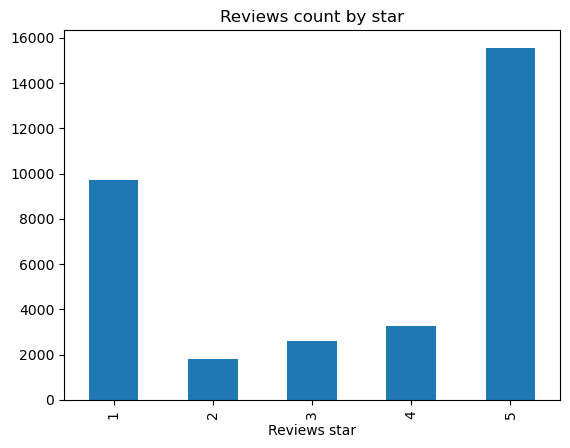

In [11]:
ax=df['rating'].value_counts().sort_index().plot(kind='bar',title='Reviews count by star')
ax.set_xlabel('Reviews star')

In [12]:
#removing the Duplicates if any
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [13]:
df['rating'].value_counts()

5    15558
1     9726
4     3244
3     2585
2     1796
Name: rating, dtype: int64

<Axes: xlabel='week', ylabel='rating'>

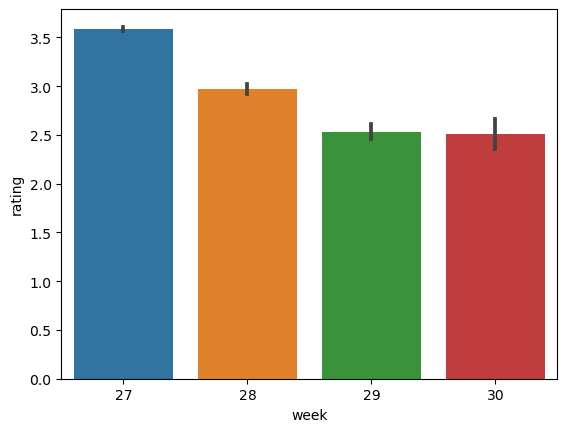

In [14]:
sns.barplot(df, x='week',y='rating')

Text(0.5, 0, 'Week')

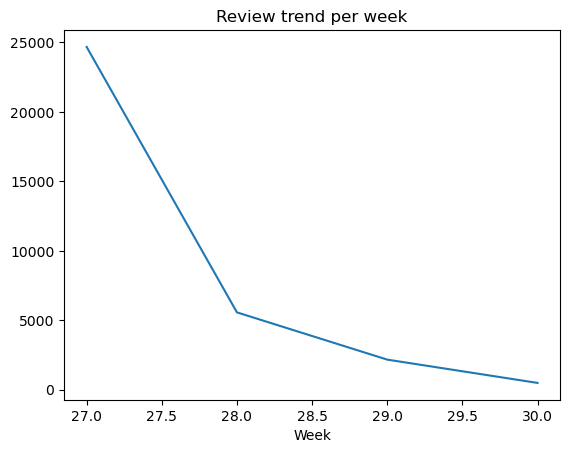

In [15]:
review_week = df['week'].value_counts().sort_index()
plt.plot(review_week)
plt.title('Review trend per week')
plt.xlabel('Week')

Text(0.5, 0, 'Day Name')

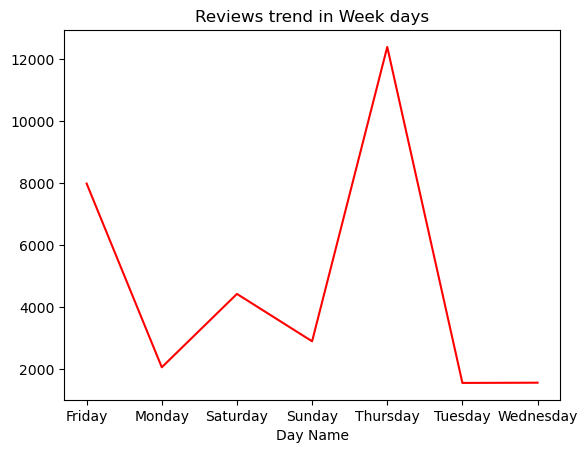

In [16]:
review_day = df['day_name'].value_counts().sort_index()
plt.plot(review_day,color='r')
plt.title('Reviews trend in Week days')
plt.xlabel('Day Name')

Text(0.5, 0, 'Day number')

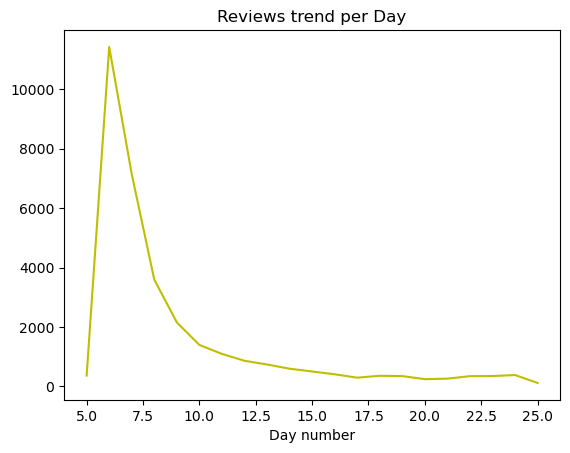

In [17]:
review_each_day = df['day'].value_counts().sort_index()
plt.plot(review_each_day,color='y')
plt.title('Reviews trend per Day')
plt.xlabel('Day number')

Text(0.5, 0, 'day number')

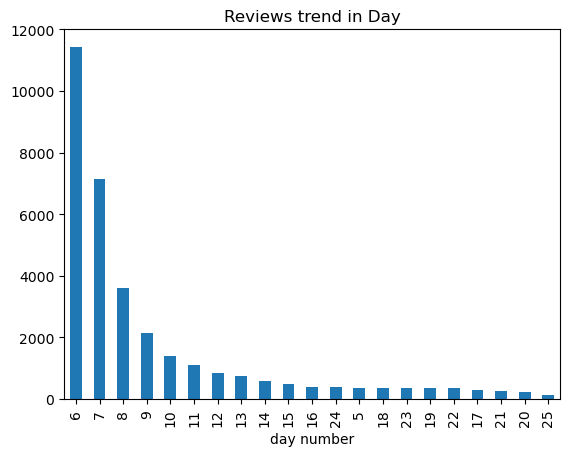

In [18]:
rating_day=df['day'].value_counts()
rating_day.plot(kind='bar')
plt.title('Reviews trend in Day')
plt.xlabel('day number')

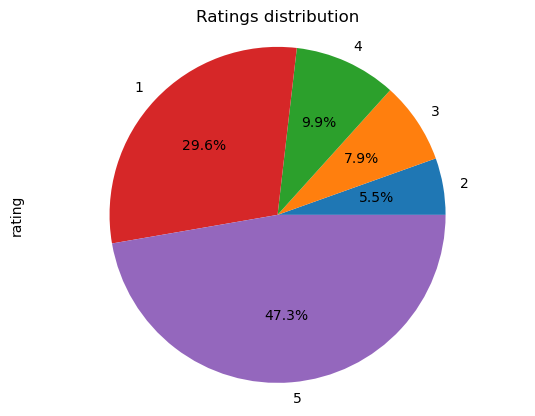

In [19]:
# Rating distribution
rating_counts = df['rating'].value_counts().sort_values()
rating_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Ratings distribution')
plt.axis('equal')
plt.show()

In [20]:
df['source'].unique()

array(['Google Play', 'App Store'], dtype=object)

In [21]:
df['source'].value_counts()

Google Play    30270
App Store       2639
Name: source, dtype: int64

<Axes: xlabel='source', ylabel='count'>

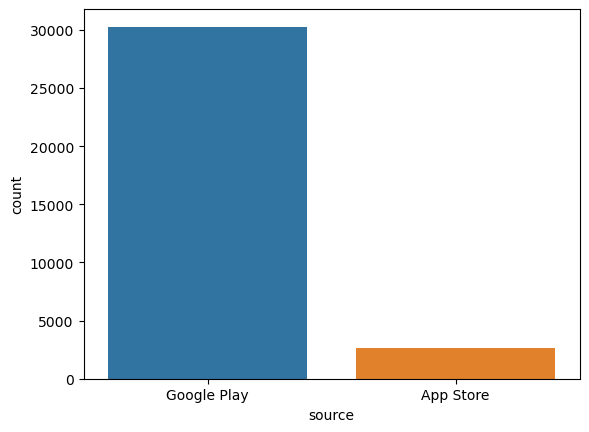

In [22]:
sns.countplot(df, x='source')

In [23]:
df= df[df['rating'] != 3]
def polarity(x):
    if x < 3:
        return 0
    else:
        return 1
df["rating"] = df["rating"].map(polarity)


In [24]:
df.reset_index(drop=True)

,source,review_description,rating,review_date,date,day,day_name,week,month,year
0,Google Play,Meh. Not the greatest experience on a Chromebo...,0,2023-07-08 14:18:24,2023-07-08,8,Saturday,27,7,2023
1,Google Play,"Currently, it's very challenging to use. It's ...",0,2023-07-18 22:30:10,2023-07-18,18,Tuesday,29,7,2023
2,Google Play,I still don’t want to see content from people ...,0,2023-07-19 19:35:31,2023-07-19,19,Wednesday,29,7,2023
3,Google Play,Could be great if all pages loaded when you cl...,0,2023-07-06 14:35:15,2023-07-06,6,Thursday,27,7,2023
4,Google Play,Not bad! This is its first launch. There is st...,1,2023-07-06 23:41:13,2023-07-06,6,Thursday,27,7,2023
...,...,...,...,...,...,...,...,...,...,...
30319,App Store,This killed my dog. Mark zuckerburg strangled ...,0,2023-07-06 01:23:55,2023-07-06,6,Thursday,27,7,2023
30320,App Store,Add Search and hashtag like Twitter !,0,2023-07-19 08:01:06,2023-07-19,19,Wednesday,29,7,2023
30321,App Store,bad twister,0,2023-07-17 06:39:13,2023-07-17,17,Monday,29,7,2023
30322,App Store,Yet another trash from Meta.,0,2023-07-07 17:47:16,2023-07-07,7,Friday,27,7,2023


In [25]:
df['rating'].value_counts()

1    18802
0    11522
Name: rating, dtype: int64

<Axes: ylabel='rating'>

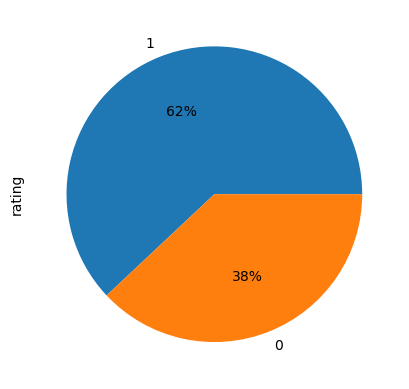

In [26]:
df['rating'].value_counts().plot(kind='pie', autopct='%1.f%%')

In [27]:
data = pd.DataFrame(df, columns=['review_description','rating'])
print(data.shape)
data.head(2)

(30324, 2)


,review_description,rating
0,Meh. Not the greatest experience on a Chromebo...,0
5,"Currently, it's very challenging to use. It's ...",0


In [28]:
data.reset_index(inplace=True)

In [29]:
data

,index,review_description,rating
0,0,Meh. Not the greatest experience on a Chromebo...,0
1,5,"Currently, it's very challenging to use. It's ...",0
2,6,I still don’t want to see content from people ...,0
3,7,Could be great if all pages loaded when you cl...,0
4,9,Not bad! This is its first launch. There is st...,1
...,...,...,...
30319,32905,This killed my dog. Mark zuckerburg strangled ...,0
30320,32906,Add Search and hashtag like Twitter !,0
30321,32907,bad twister,0
30322,32908,Yet another trash from Meta.,0


In [30]:
data.dtypes

index                  int64
review_description    object
rating                 int64
dtype: object

In [31]:
data['review'] = data['review_description']
data['sentiment'] = data['rating']
data.drop(['review_description'],axis =1,inplace = True)
data.drop(['rating'],axis =1,inplace = True)
data.head()

,index,review,sentiment
0,0,Meh. Not the greatest experience on a Chromebo...,0
1,5,"Currently, it's very challenging to use. It's ...",0
2,6,I still don’t want to see content from people ...,0
3,7,Could be great if all pages loaded when you cl...,0
4,9,Not bad! This is its first launch. There is st...,1


In [32]:
#lowering
data['review'] = data['review'].str.lower()
data.head()

,index,review,sentiment
0,0,meh. not the greatest experience on a chromebo...,0
1,5,"currently, it's very challenging to use. it's ...",0
2,6,i still don’t want to see content from people ...,0
3,7,could be great if all pages loaded when you cl...,0
4,9,not bad! this is its first launch. there is st...,1


In [33]:
# cleaning punctuations from the sentence
def cleanpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [34]:
data['review'] = data['review'].apply(lambda text: cleanpunc(text))

In [35]:
data['review'][9]

'it needs a lot of work  it constantly crashes  to the point where i can barely use it  it isnt auto-following everyone i follow on insta  i cant search for terms  which lead me to a topic im interested in and the layout feels quite lacking  it needs some sort of visual flare: animations  pops of colour  page transitions  etc    just something to make it all feel pleasing and tie it into a great package '

(-0.5, 399.5, 199.5, -0.5)

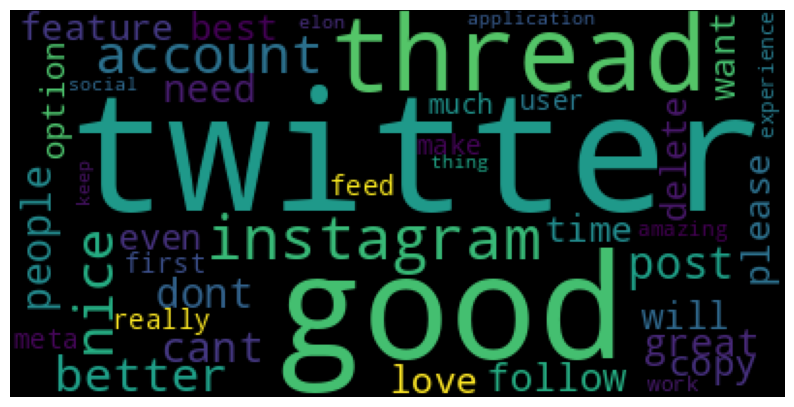

In [36]:
from wordcloud import WordCloud
text = ' '.join(data['review'])
word= WordCloud(collocations =False, background_color = 'black', max_words = 40,
               min_word_length = 4).generate(text)
plt.figure(figsize=(10,6))
plt.imshow(word)
plt.axis('off')

In [37]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
port = PorterStemmer()

In [38]:
corpus = []
for i in range(0,len(data)):
    rev = re.sub('[^a-zA-Z0-9]',' ',str(data['review'][i]))
    rev = rev.split()
    rev = [port.stem(word) for word in rev if not word in stopwords.words('english')]
    rev = ' '.join(rev)
    corpus.append(rev)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500, binary=True)
X= cv.fit_transform(corpus).toarray()

In [40]:
X.shape

(30324, 2500)

In [41]:
y= data['sentiment']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
X_train, y_train

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 7907     0
 11740    0
 7589     0
 20660    1
 9305     1
         ..
 5695     1
 8006     1
 17745    1
 17931    1
 13151    0
 Name: sentiment, Length: 21226, dtype: int64)

In [44]:
#
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

In [45]:
pred_naive = model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_test,pred_naive)
print(score)

0.8627170806770719


In [47]:
print(classification_report(y_test, pred_naive))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      3431
           1       0.87      0.92      0.89      5667

    accuracy                           0.86      9098
   macro avg       0.86      0.84      0.85      9098
weighted avg       0.86      0.86      0.86      9098



In [48]:
#
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500)
X = tv.fit_transform(corpus).toarray()

In [49]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [50]:
model =MultinomialNB().fit(X_train,y_train)

In [51]:
pred_naive = model.predict(X_test)

In [52]:
score = accuracy_score(y_test, pred_naive)
print(score)

0.8637063090789184


In [53]:
print(classification_report(y_test, pred_naive))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      3431
           1       0.87      0.92      0.89      5667

    accuracy                           0.86      9098
   macro avg       0.86      0.85      0.85      9098
weighted avg       0.86      0.86      0.86      9098



In [54]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter=1000)
X = tv.fit_transform(corpus).toarray()
model2.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [55]:
pred_log = model2.predict(X_test)

In [56]:
score = accuracy_score(y_test, pred_log)
print(score)

0.8672235656188173


In [57]:
print(classification_report(y_test, pred_log))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      3431
           1       0.87      0.93      0.90      5667

    accuracy                           0.87      9098
   macro avg       0.87      0.85      0.85      9098
weighted avg       0.87      0.87      0.87      9098



In [58]:
X= cv.fit_transform(corpus).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [59]:
pred_log1 = model2.predict (X_test)

In [60]:
score =accuracy_score(y_test,pred_log1)
print(score)

0.6724554847219169


In [61]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()

In [62]:
X= cv.fit_transform(corpus).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [63]:
model3.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
y_pred = model3.predict(X_test)

In [65]:
score = accuracy_score(y_test, y_pred)
print(score)

0.8563420531985052


In [66]:
X= tv.fit_transform(corpus).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [67]:
model3.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
y_pred = model3.predict(X_test)

In [69]:
score = accuracy_score(y_test, y_pred)
print(score)

0.8582105957353264
